# Vibrational Motion

In the previous notebook, we discussed quantum mechanical models for translational motion: the free-particle, the particle-in-a-box model, the finite square well potential model, and tunneling through a one-dimensional potential energy barrier. In this notebook, we continue exploring simple model problems, with a focus, this time, on vibrational motion. In particular, we will find analytic solutions the Schrödinger equation for the (one-dimensional) quantum harmonic oscillator (QHO) model, which captures the main qualitative features of vibrational motion in molecular systems. 

## The Harmonic Potential

A harmonic oscillator is a system that, when displaced from its equilibrium position, experiences a harmonic restoring force, which is proportional to the displacement. In one dimension, this force would be

$$ F_x = -k x$$

where $x$ is the displacement from the equilibrium position and $k$ is the proportionality constant, which is called the force constant. Recall that force and potential are related by

$$ F_x = -\frac{d V(x)}{dx} = -kx$$

Integrating this expression yields the potential

$$ V(x) = \frac{1}{2} k x^2 + c$$

where $c$ is an arbitrary additive constant. This constant will not affect the solutions to the classical or quantum harmonic oscillator problem, but it will provide an arbitrary shift to the associated energies. For convenience, we choose $c = 0$, and we proceed with the potential

$$ V(x) = \frac{1}{2} kx^2$$

or 

$$ V(x) = \frac{1}{2} k (x - x_e)^2$$

where $x_e$ represents the equilibrium position of the oscillator (if it is not zero).

Because the harmonic oscillator problem is a model for molecular vibrations, it will be illustrative to consider how this potential relates to one for an actual molecular system. For the sake of simlicity, let us take the molecule to be molecular hydrogen, H$_2$. Below, we will calculate the potential energy curve along the bond stretch coordinate for H$_2$ using one of the simplest procedures for finding approximate solutions to the electronic part of the Schrödinger equation, the Hartree-Fock approach. You can read more about Hartree-Fock theory in [this notebook](https://deprincelab.github.io/tutorials/jupyter_notebooks/hartree_fock/index.html). Specifically, we will use the unrestricted Hartree-Fock approach, as implemented in the [Psi4](https://psicode.org) electronic structure package.

In [11]:
import psi4
import numpy as np

# set molecule
mol = psi4.geometry("""
h
h 1 x
symmetry c1
""")   

# set some options for psi4
psi4.set_options({'basis': 'cc-pvdz',
                  'guess_mix': True,
                  'reference': 'uhf'})

# tell psi4 not to print any output to the screen
psi4.core.be_quiet()

# calculate the energy at different H-H separations, x
psi4.activate(mol)
potential = []
dx = 0.05
x = np.arange(0.4, 3.05, dx)
for i in range (0, len(x)):
    mol.x = x[i]
    en = psi4.energy('scf')
    potential.append(en)

Now, let us visualize this potential (shifted so that the minimum value is zero)

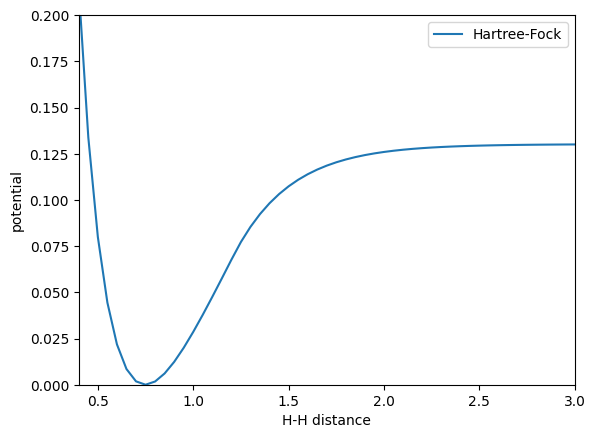

In [12]:
# minimum energy
V_e = min(potential)

# shift potential so the minimum value is zero
potential = np.array(potential) - V_e

import matplotlib.pyplot as plt

plt.figure()
plt.plot(x, potential, label='Hartree-Fock')
plt.xlim(x[0], x[-1])
plt.ylim(0, 0.2)
plt.ylabel('potential')
plt.xlabel('H-H distance')
plt.legend()
plt.show()

Near the equilibrium H-H distance, the potential in which the nuclei live looks harmonic, i.e., it could be approximated by a quadratic function. How can we extract an appropriate force constant, $k$, from this potential? Well, if 

$$ V(x) = \frac{1}{2} k(x-x_e)^2$$

then, 

$$ k = \frac{d^2}{dx^2} V(x) $$

We can calculate the second derivative of the potential numerically, via the centered [finite difference](https://en.wikipedia.org/wiki/Finite_difference) formula

$$k \approx \frac{V(x_e + h) - 2 V(x_e) + V(x_e - h)}{h} $$

where $h$ is a displacement from the equilbrium H-H distance, $x_e$. Here, we calculate $k$ in this way and visualize the harmonic and Hartree-Fock potentials together.

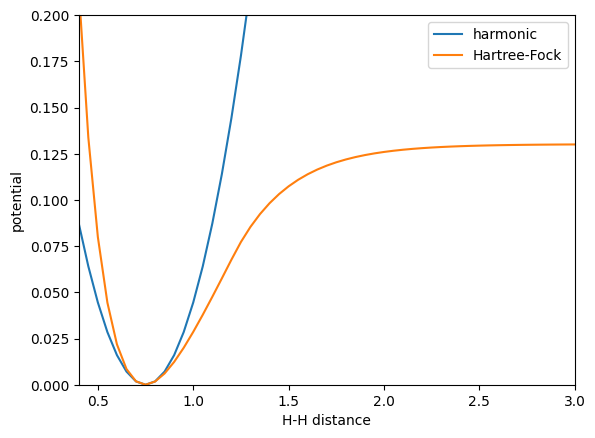

In [13]:
# equilbirum bond length
idx = np.argmin(potential)
x_e = x[idx]

# k = d^2 V(x) / dx^2
k = (potential[idx+1] - 2.0 * potential[idx] + potential[idx-1]) / dx**2

# harmonic potential
harmonic = 0.5 * k * (x-x_e)**2

plt.figure()
plt.plot(x, harmonic, label='harmonic')
plt.plot(x, potential, label='Hartree-Fock')
plt.xlim(x[0], x[-1])
plt.ylim(0, 0.2)
plt.ylabel('potential')
plt.xlabel('H-H distance')
plt.legend()
plt.show()

Clearly these potentials have some major qualitative differences, the most obvious of which is that the Hartree-Fock potential tends to some constant value in the limit of dissociation, whereas the harmonic potential does not. Indeed, for the harmonic potential, $V(x)$, 

$$ \lim_{x\to\infty} V(x) = \infty $$

Nonetheless, the harmonic potential does a reasonable job of approximating the Hartree-Fock one near equilibrium. Hence, we consider the quantum harmonic oscillator model to be useful for describing low-energy vibrational states only. Higher-energy states will be poorly described by this model. 

## One-Dimensional Classical Harmonic Oscillator

Now, we seek solultions to the classical harmonic oscillator problem. Recall that the harmonic restoring force is linear in the displacement, 

$$ F_x = -k x(t)$$

where $x(t)$ is the displacement from equilbrium, which varies with time, $t$, and $k$ is the proportionality constant, which is called the force constant. Classically, we can find an analytic form for how the displacement evolves over time with the help of Newton's second law,

$$F_x = m a_x(t)$$

where the acceleration of the oscillator, $a_x(t)$, is the second time derivative of the position

$$a_x(t) = \frac{d^2}{dt^2} x(t)$$

So, we seek a solution to the differential equation

$$ m \frac{d^2}{dt^2} x(t) = -k x(t)$$, which has a general solution

$$ x(t) = C\text{sin}\left ( \left [ k/m \right ]^{1/2} t \right ) + D \text{cos}\left( \left [ k/m \right ]^{1/2} t \right )$$

or 

$$ x(t) = A\text{sin}\left ( \left [ k/m \right ]^{1/2} t + B \right ) $$

where $B$ represents a phase shift. So, harmonic motion looks sinusoidal:

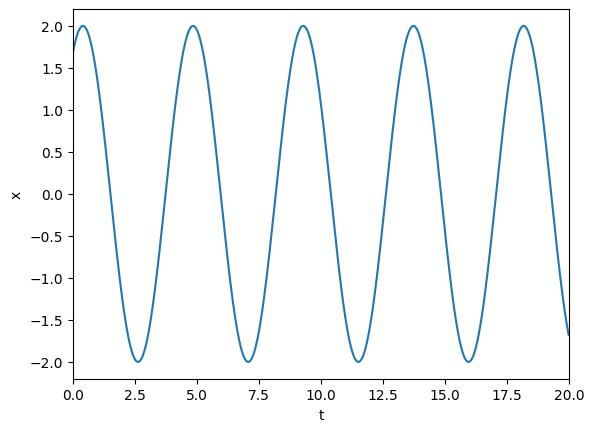

In [14]:
t = np.arange(0, 20, 0.01)

k = 4.0
m = 2.0
B = 1.0
A = 2.0

sin_t = A * np.sin(np.sqrt(k/m) * t + B)

plt.figure()
plt.plot(t, sin_t)
plt.xlim(0, 20)
plt.ylabel('x')
plt.xlabel('t')
plt.show()

Here, we can see that the displacement, $x$, oscillates between $A$ and $-A$ with a frequency, $\nu$, defined by

$$ \nu = \frac{1}{2\pi}  \left ( \frac{k}{m} \right )^{1/2}$$

It will be useful at times to also consider the *angular frequency*, $\omega$, which is related to $\nu$ by a factor of $2 \pi$, i.e.,

$$ \omega = 2 \pi \nu = \left ( \frac{k}{m} \right )^{1/2}$$

## One-Dimensional Quantum Harmonic Oscillator

Now, we would like to consider the quantum mechanical analogue of the harmonic oscillator, the quantum harmonic oscillator (QHO).